## Bike Sharing Assignment

## **Problem Statement**
A bike-sharing system offers bikes for short-term use, either for a fee or free of charge. Users can borrow a bike from a computer-controlled "dock" by entering payment information, and the system unlocks the bike. The bike can then be returned to any dock within the same system.

BoomBikes, a US bike-sharing provider, has experienced significant revenue declines due to the ongoing COVID-19 pandemic. The company is struggling to sustain itself in the current market conditions. To address this, BoomBikes aims to develop a strategic business plan to boost revenue once the lockdown ends and the economy recovers.

BoomBikes seeks to understand the demand for shared bikes post-quarantine. They plan to prepare for the increased demand and differentiate themselves from competitors to achieve substantial profits. To achieve this, they have hired a consulting firm to analyze the factors influencing the demand for shared bikes in the American market. Specifically, they want to identify:

* Significant variables in predicting the demand for shared bikes.

* How well these variables explain bike demand.

Using data from meteorological surveys and people's habits, the service provider has compiled a large dataset on daily bike demand across the American market.

## Objective
Our task is to model the demand for shared bikes using the available independent variables. This model will help management understand how demand varies with different features, allowing them to adjust their business strategy to meet demand levels and customer expectations. Additionally, the model will provide insights into the demand dynamics of a new market.

### Step 1: Importing Libraries

In [7]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Machine Learning libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')

### Step 2: Data Understanding, Preparation, and Exploratory Data Analysis (EDA)
A. **Data Understanding**
- Loading the Dataset
- Initial Inspection
- Data Types and Missing Values
    
B. **Data Preparation**
- Data Cleaning
- Data Conversion
- Feature Engineering
    
C. **Exploratory Data Analysis (EDA)**
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [8]:
# Loading the dataset
df = pd.read_csv('day.csv')

In [9]:
# Checking the first 5 rows of the DataFrame
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Checking dimensions
df.shape

(730, 16)

In [11]:
# Checking datatypes and other information related to data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Calculate the row-wise percentage of null values in the dataset and sort in descending order
null_percentage_by_row = round(100 * (df.isnull().sum(axis=1) / len(df)), 2).sort_values(ascending=False)
null_percentage_by_row

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [13]:
# Calculate the column-wise percentage of null values in the dataset and sort in descending order
null_percentage_by_col = round(100 * (df.isnull().sum() / len(df)), 2).sort_values(ascending=False)
null_percentage_by_col

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
# Check for duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Removing Columns from the Dataset
**We will remove certain columns from the dataset with clear justifications:**

- Eliminate casual and registered: Our focus is on the total bike count (cnt).

- Drop instant: This column is redundant as it only contains indexing numbers.

- Exclude dteday: The mnth and yr columns provide sufficient date information.

In [15]:
df.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)
df.shape

(730, 12)

#### Data Conversion based on provided dictionary

1. **Season Conversion:**

    - Converted numerical values (1, 2, 3, 4) to categorical values (Spring, Summer, Fall, Winter).

2. **Month Conversion:**

    - Transformed numerical month values (1, 2, ..., 12) into categorical month names (January, February, ..., December).

3. **Weekday Conversion:**

    - Changed numerical weekday values (0, 1, ..., 6) into categorical weekday names (Sunday, Monday, ..., Saturday).

4. **Weather Situation Conversion:**

    - Mapped numerical weather situation values to categorical descriptions:

        1: Good (Clear, Few clouds, Partly cloudy)

        2: Moderate (Mist, Mist + Cloudy, Mist + Broken clouds)

        3: Bad (Light Snow, Light Rain + Thunderstorm)

        4: Severe (Heavy Rain + Ice Pellets, Snow + Fog)

In [16]:
# Season Conversion
df['season'] = df['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Month Conversion
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_name[x])

# Weekday Conversion
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_name[x])

# Weather Situation Conversion
df['weathersit'] = df['weathersit'].replace({
    1: 'Good',
    2: 'Moderate',
    3: 'Bad',
    4: 'Severe'
})

# Confirming the conversions
print(df.head())


   season  yr     mnth  holiday    weekday  workingday weathersit       temp  \
0  Spring   0  January        0     Sunday           0   Moderate  14.110847   
1  Spring   0  January        0     Monday           0   Moderate  14.902598   
2  Spring   0  January        0    Tuesday           1       Good   8.050924   
3  Spring   0  January        0  Wednesday           1       Good   8.200000   
4  Spring   0  January        0   Thursday           1       Good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  


## Exploratory Data Analysis

### 1. Univariate Analysis
#### Analyzing Continuous (Numerical) Variables

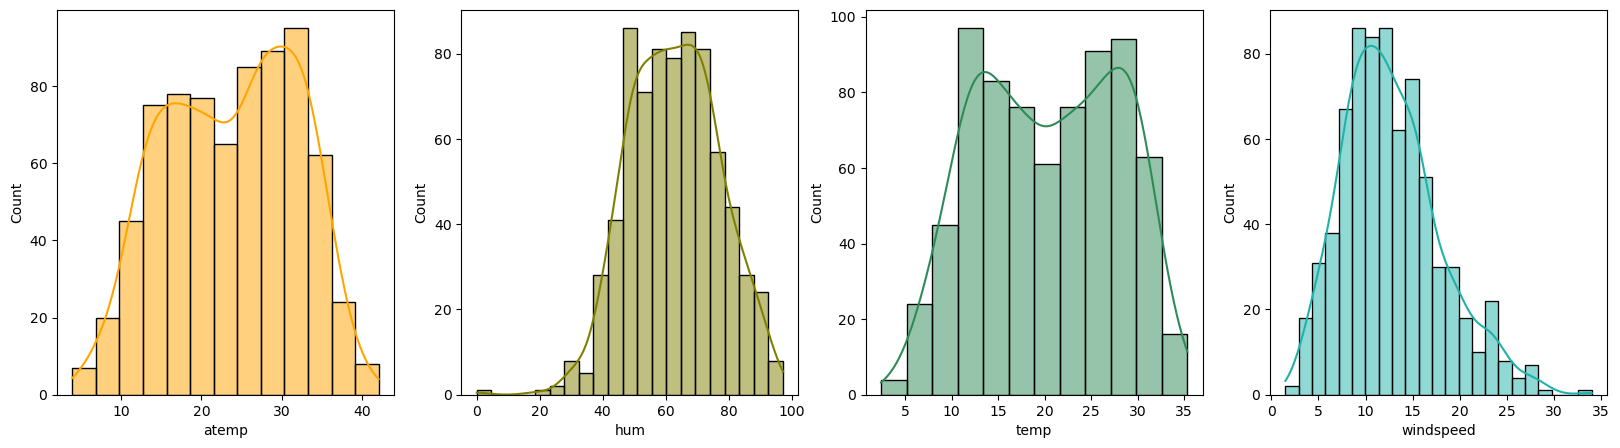

In [17]:
# Create subplots for each continuous variable
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
# Configuration for continuous variables
cont_config = {
    'atemp': { 'color': 'orange' },
    'hum': { 'color': 'olive' },
    'temp': { 'color': 'seagreen' },
    'windspeed': { 'color': 'lightseagreen' }
}
# Plot histograms for each continuous variable
for i, (cont, config) in enumerate(cont_config.items()):
    sns.histplot(data=df, x=cont, ax=ax[i], color=config['color'], kde=True)

# Display the plots
plt.show()


**Summary of Bike Rental Conditions**
- Average Temperature: Bikes were rented at an average temperature of 20°C.

- Average Feels-Like Temperature: The perceived temperature during bike rentals was approximately 24°C.

- Average Humidity: Humidity levels averaged around 62%.

- Average Wind Speed: The wind speed during bike rentals was approximately 12 km/h.

### Analyzing Categorical Variables

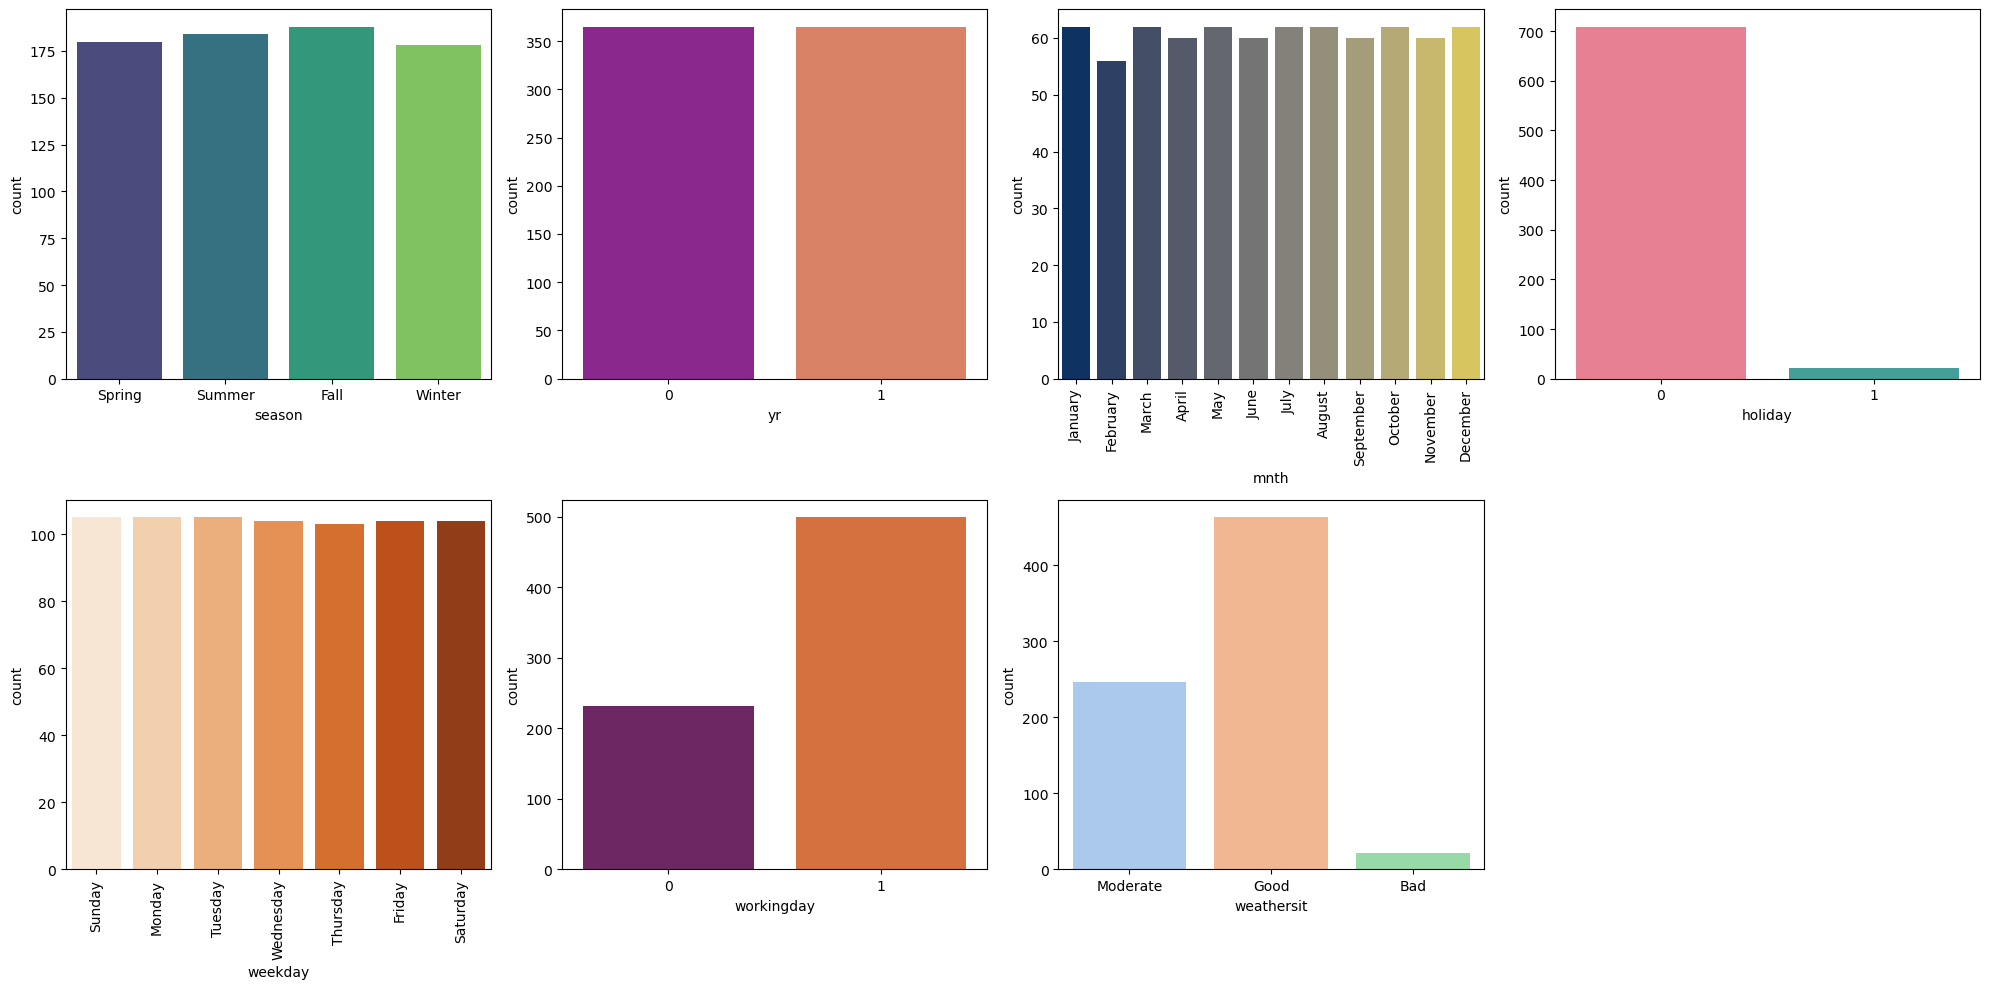

In [18]:
# Configuration for categorical variables
categorical_config = {
    'season': { 'rotation': 0, 'palette': 'viridis' },
    'yr': { 'rotation': 0, 'palette': 'plasma' },
    'mnth': { 'rotation': 90, 'palette': 'cividis' },
    'holiday': { 'rotation': 0, 'palette': 'husl' },
    'weekday': { 'rotation': 90, 'palette': 'Oranges' },
    'workingday': { 'rotation': 0, 'palette': 'inferno' },
    'weathersit': { 'rotation': 0, 'palette': 'pastel' }
}

# Create subplots for each categorical variable
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot count plots for each categorical variable
for i, (category, config) in enumerate(categorical_config.items()):
    sns.countplot(data=df, x=category, palette=config['palette'], ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xticklabels(ax[i // 4, i % 4].get_xticklabels(), rotation=config['rotation'])

# Hide the last column
ax[1, 3].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights from Categorical Variables Analysis
- **Favorable Weather:** Bike rentals significantly increase during favorable weather conditions.

- **Working Days and Non-Holidays:** There is a clear preference for bike rentals on working days and non-holidays.

- **Other Categorical Variables:** Minimal variation is observed across different categories for other categorical variables.

### Bivariate Analysis

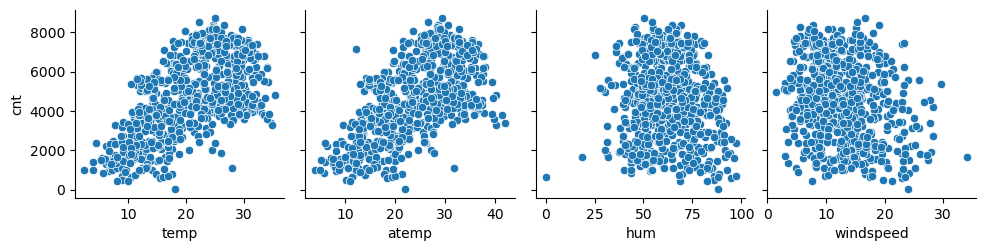

In [19]:
# creating a pairplot between the numerical variables
sns.pairplot(data=df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

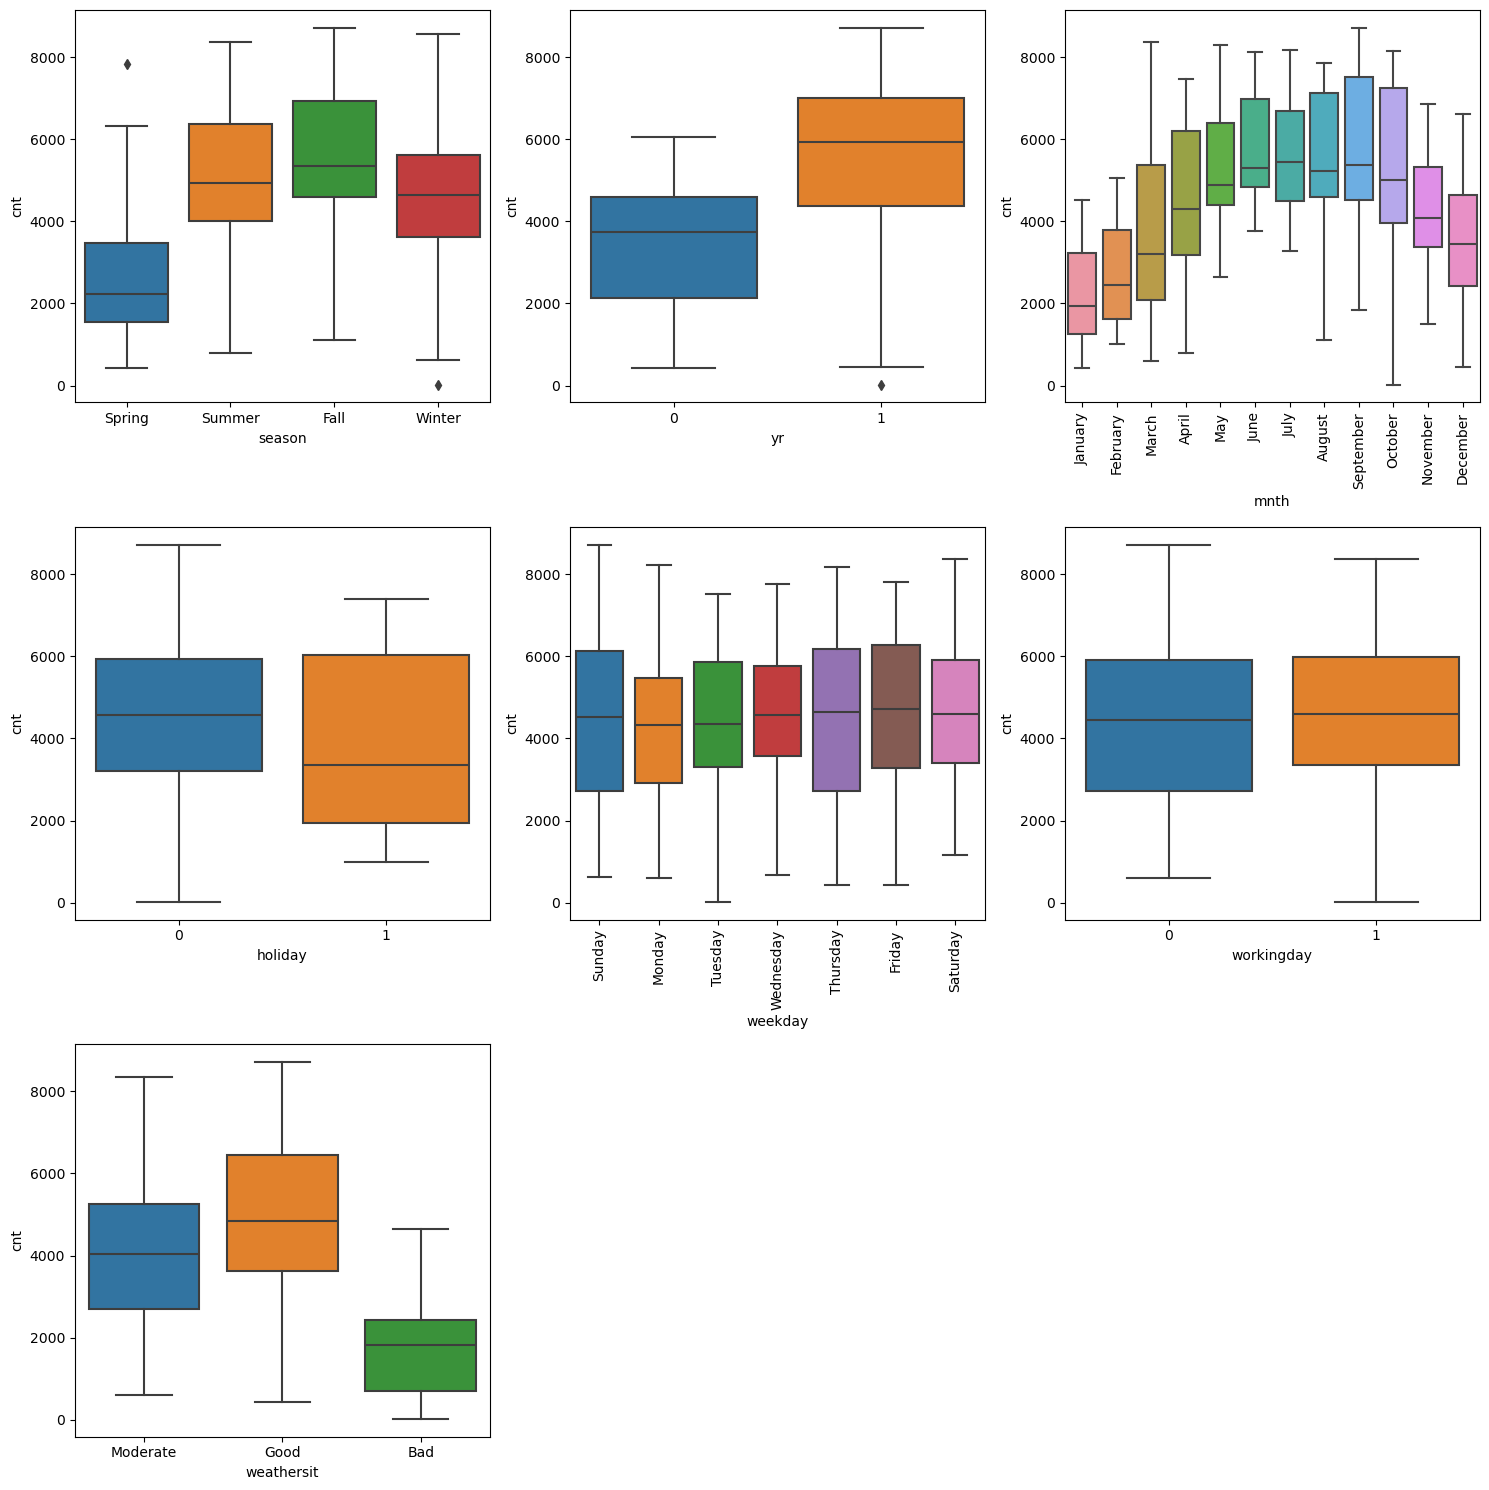

In [20]:
# Draw boxplot for categorical variables against the dependent variable `cnt` 
plt.figure(figsize=(15, 15)) 
for i, (category, config) in enumerate(categorical_config.items()): 
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(data=df, x=category, y='cnt') 
    plt.xticks(rotation=config['rotation']) 
plt.tight_layout() 
plt.show()

**Key Insights from box plots:**
- **Seasonal Trends:** Bike rentals were slightly higher in the fall compared to summer.

- **Yearly Comparison:** There were more bike rentals in 2019 than in 2018.

- **Peak Months:** The highest number of bike rentals occurred between July and September.

- **Holiday Impact:** Bikes were rented more frequently on non-holidays and working days.

- **Weather Influence:** The highest bike rentals were observed during good weather conditions.

### Multivariate Analysis

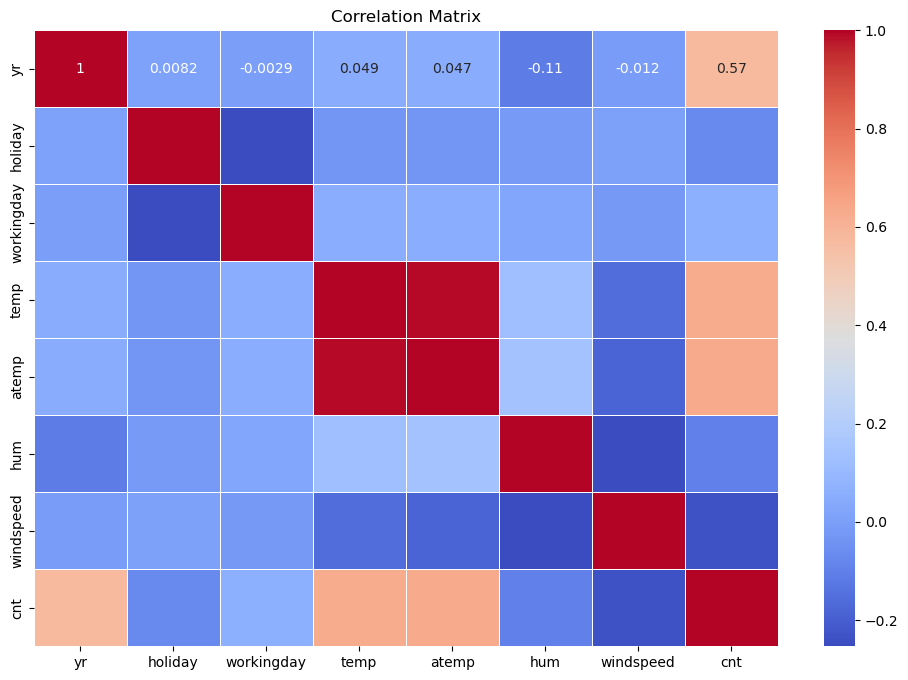

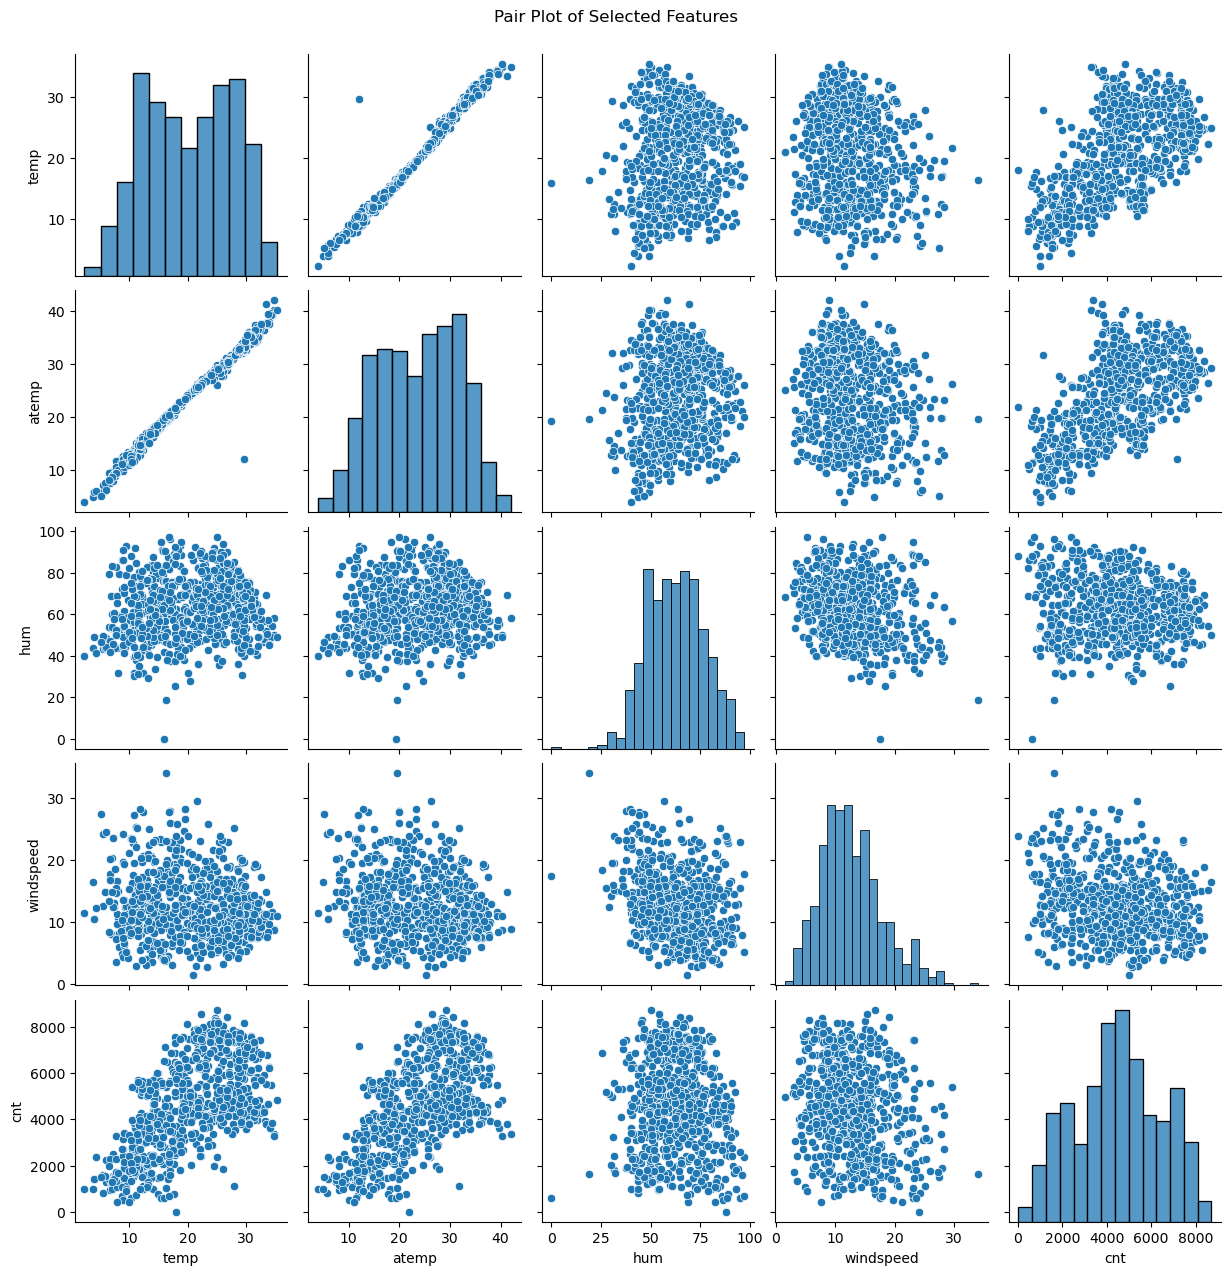

In [21]:
# Correlation matrix
plt.figure(figsize=(12, 8))
selected_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

# Pair plot for selected features
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

**Key Insights from Correlation Analysis**
- **Positive Correlation:** The variables yr, workingday, temp, and atemp exhibit a positive correlation with cnt, suggesting that higher values in these variables are linked to increased bike rentals.

- **Redundancy Alert:** The strong correlation between atemp and temp suggests potential redundancy. It may be beneficial to use feature elimination to determine which variable to retain.

- **Negative Correlation:** The variables holiday, hum, and windspeed show a negative correlation with cnt, indicating that higher values in these variables are associated with lower bike rentals.

### Creation of dummy variables using one-hot encoding

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [23]:
# Creating dummy variables for categorical columns 
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True) 

# Displaying the first few rows of the DataFrame to confirm the changes 
print(df.head())

   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_October  mnth_September  \
0           True          False  ...         False           False   
1           True          False  ...         False           False   
2           True          False  ...         False           False   
3           True          False  ...         False           False   
4           True          False  ...         False           False   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0           False             False        

### Step 3: Model Building and Evaluation
A. **Splitting the Dataset**

- Spliting the data into training and test sets (70% training, 30% test).

B. **Feature Scaling**

- Using StandardScaler to scale the features for consistent magnitudes.

C. **Feature Selection**

- Applying Recursive Feature Elimination (RFE) to select the top features.

D. **Model Building**

- Creating and fitting the model using Ordinary Least Squares (OLS) regression.

E. **Model Evaluation**

- Evaluating the model using metrics like R-squared, Adjusted R-squared, and Variance Inflation Factor (VIF).

In [24]:
# Splitting the data into training and test sets (70% training, 30% test)
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Using StandardScaler to scale the features for consistent magnitudes.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Applying Recursive Feature Elimination (RFE) to select the top 15 features.
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_December', 'mnth_July',
       'mnth_November', 'weekday_Monday', 'weekday_Sunday', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')


In [27]:
# Model Building: Creating and fitting the model using Ordinary Least Squares (OLS) regression

# Convert the scaled features back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled[:, rfe.support_], columns=selected_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled[:, rfe.support_], columns=selected_features, index=X_test.index)

# Add a constant to the model
X_train_sm = sm.add_constant(X_train_scaled_df)
X_test_sm = sm.add_constant(X_test_scaled_df)

# Fit the model
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          9.63e-186
Time:                        23:24:40   Log-Likelihood:                -4127.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4552.9511    

In [28]:
# Model Evaluation: Evaluating the model using metrics like R-squared, Adjusted R-squared, and Variance Inflation Factor (VIF).

# Predicting on the test set
y_pred = ols_model.predict(X_test_sm)

# Calculating R-squared and Adjusted R-squared
r2 = ols_model.rsquared
adj_r2 = ols_model.rsquared_adj
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

# Calculating VIF for the selected features (excluding the constant term)
vif_data = pd.DataFrame()
vif_data["feature"] = ["const"] + list(selected_features)
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(X_train_sm.shape[1])]

# Exclude the constant term from the VIF DataFrame
vif_data = vif_data.iloc[1:]

print(vif_data)

R-squared: 0.8380955835147819
Adjusted R-squared: 0.8335257007914088
                feature        VIF
1                    yr   1.031334
2               holiday        inf
3            workingday        inf
4                 atemp   3.539292
5                   hum   1.857733
6             windspeed   1.219073
7         season_Spring   2.871926
8         season_Winter   2.175486
9         mnth_December   1.264971
10            mnth_July   1.305429
11        mnth_November   1.707782
12       weekday_Monday        inf
13       weekday_Sunday        inf
14      weathersit_Good  10.701700
15  weathersit_Moderate   9.113701


#

#### As we need to frequently calculate VIF, model summary, and adjusted R² for evaluation, let's create utility functions for these tasks.

### Step 4: Utility Functions

A. **Adjusted R2 Score Calculation**

- Calculating the adjusted R-squared score to account for the number of predictors.

B. **VIF Calculation**

- Calculating Variance Inflation Factor (VIF) to check for multicollinearity.

C. **Model Summary Generation**

- Generating and fitting an OLS model using statsmodels and printing the model summary.

In [35]:
def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the dataset.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the features.
    
    Returns:
    pd.DataFrame: DataFrame with features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def model_summary(X, y):
    """
    Fit an OLS model and print the summary.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the features.
    y (pd.Series): Series containing the target variable.
    
    Returns:
    sm.OLS: Fitted OLS model.
    """
    X = sm.add_constant(X)
    ols_model = sm.OLS(y, X).fit()
    print(ols_model.summary())
    return ols_model

def adjusted_r2_score(ols_model, X, y):
    """
    Calculate the adjusted R-squared score for the model.
    
    Parameters:
    ols_model (sm.OLS): Fitted OLS model.
    X (pd.DataFrame): DataFrame containing the features.
    y (pd.Series): Series containing the target variable.
    
    Returns:
    float: Adjusted R-squared score.
    """
    r2 = ols_model.rsquared
    n = X.shape[0]
    p = X.shape[1] - 1  # subtracting 1 for the constant term
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

#

### Step 5: Manual Feature Elimination

A. **Identifying Multicollinearity**

- Checking for high correlation between features using VIF.

B. **Removing Insignificant Features**

- Excluding features with high p-values and VIF to refine the model.

C. **Model Iterations**

- Iteratively refining the model by removing insignificant features and re-evaluating.

In [29]:
# Remove Features with High VIF:
# holiday, workingday, weekday_Monday, and weekday_Sunday have infinite VIF values, indicating perfect multicollinearity.

# Evaluate Features with High P-values:
# Although all features have significant p-values (P < 0.05), it's essential to keep an eye on features with relatively higher p-values.


# Considering above two points, we will first remove holiday

### Model 2

In [38]:
# After dropping 'holiday' from X_train_sm
X_train_sm2 = X_train_sm.drop(['holiday'], axis=1)

# Fit the model and print the summary
ols_model2 = sm.OLS(y_train, X_train_sm2).fit()
print(ols_model2.summary())

# Calculate VIF for the selected features (excluding the constant term)
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_train_sm2.columns
vif_data2["VIF"] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]

print(vif_data2)

# Calculate adjusted R-squared
adj_r2 = adjusted_r2_score(ols_model2, X_train_sm2, y_train)
print(f"Adjusted R-squared: {adj_r2}")


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          9.63e-186
Time:                        23:40:46   Log-Likelihood:                -4127.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4552.9511    

### Model 3

**Let's remove the weathersit_Good feature due to its high VIF and re-evaluate the model.**

In [40]:
# Remove 'weathersit_Good' from the dataset
X_train_sm3 = X_train_sm2.drop(['weathersit_Good'], axis=1)

# Fit the model and print the summary
ols_model3 = sm.OLS(y_train, X_train_sm3).fit()
print(ols_model3.summary())

# Calculate VIF for the remaining features
vif_data3 = pd.DataFrame()
vif_data3["feature"] = X_train_sm3.columns
vif_data3["VIF"] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]

print(vif_data3)

# Calculate adjusted R-squared
adj_r2 = adjusted_r2_score(ols_model3, X_train_sm3, y_train)
print(f"Adjusted R-squared: {adj_r2}")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.39e-174
Time:                        23:43:30   Log-Likelihood:                -4156.8
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     497   BIC:                             8401.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4552.9511    

### Model 4

**Since weekday_Monday has a high p-value of 0.198, it indicates that this feature might not be statistically significant in predicting the target variable. Let's remove weekday_Monday from the dataset and re-evaluate the model**

In [42]:
# Remove 'weekday_Monday' from the dataset
X_train_sm4 = X_train_sm3.drop(['weekday_Monday'], axis=1)

# Fit the model and print the summary
ols_model4 = sm.OLS(y_train, X_train_sm4).fit()
print(ols_model4.summary())

# Calculate VIF for the remaining features
vif_data4 = pd.DataFrame()
vif_data4["feature"] = X_train_sm4.columns
vif_data4["VIF"] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]

print(vif_data4)

# Calculate adjusted R-squared
adj_r2 = adjusted_r2_score(ols_model4, X_train_sm4, y_train)
print(f"Adjusted R-squared: {adj_r2}")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     186.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.27e-175
Time:                        23:45:42   Log-Likelihood:                -4157.6
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     498   BIC:                             8396.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4552.9511    

**The model looks promising, with a low Prob (F-statistic) of 2.27e-175, minimal p-values(<0.05), VIF below 5 for all features, and Adjusted R² values of 0.813. However, let's try to eliminate more features for better predictability without significant impact on adjusted R-square**

### Model 5

**Let's remove the weathersit_Moderate feature and re-evaluate the model**

In [47]:
# Remove 'weathersit_Moderate' from the dataset
X_train_sm5 = X_train_sm4.drop(['weathersit_Moderate'], axis=1)

# Fit the model and print the summary
ols_model5 = sm.OLS(y_train, X_train_sm5).fit()
print(ols_model5.summary())

# Calculate VIF for the remaining features
vif_data5 = pd.DataFrame()
vif_data5["feature"] = X_train_sm5.columns
vif_data5["VIF"] = [variance_inflation_factor(X_train_sm5.values, i) for i in range(X_train_sm5.shape[1])]

print(vif_data5)

# Calculate adjusted R-squared
adj_r2 = adjusted_r2_score(ols_model5, X_train_sm5, y_train)
print(f"Adjusted R-squared: {adj_r2}")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     200.5
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          3.55e-175
Time:                        00:23:41   Log-Likelihood:                -4160.8
No. Observations:                 511   AIC:                             8346.
Df Residuals:                     499   BIC:                             8396.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4552.9511     37.236    122.

### Model 6

**Let's remove the mnth_November feature and re-evaluate the model**

In [52]:
# Remove 'season_Spring' from the dataset
X_train_sm6 = X_train_sm5.drop(['mnth_November'], axis=1)

# Fit the model and print the summary
ols_model6 = sm.OLS(y_train, X_train_sm6).fit()
print(ols_model6.summary())

# Calculate VIF for the remaining features
vif_data6 = pd.DataFrame()
vif_data6["feature"] = X_train_sm6.columns
vif_data6["VIF"] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]

print(vif_data6)

# Calculate adjusted R-squared
adj_r2 = adjusted_r2_score(ols_model6, X_train_sm6, y_train)
print(f"Adjusted R-squared: {adj_r2}")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          3.57e-173
Time:                        00:30:10   Log-Likelihood:                -4168.3
No. Observations:                 511   AIC:                             8359.
Df Residuals:                     500   BIC:                             8405.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4552.9511     37.750    120.

**This is the final model, and we will now evaluate its performance on the training set.**

R-squared (Training): 0.7903879073665063
Adjusted R-squared (Training): 0.7866224206724914


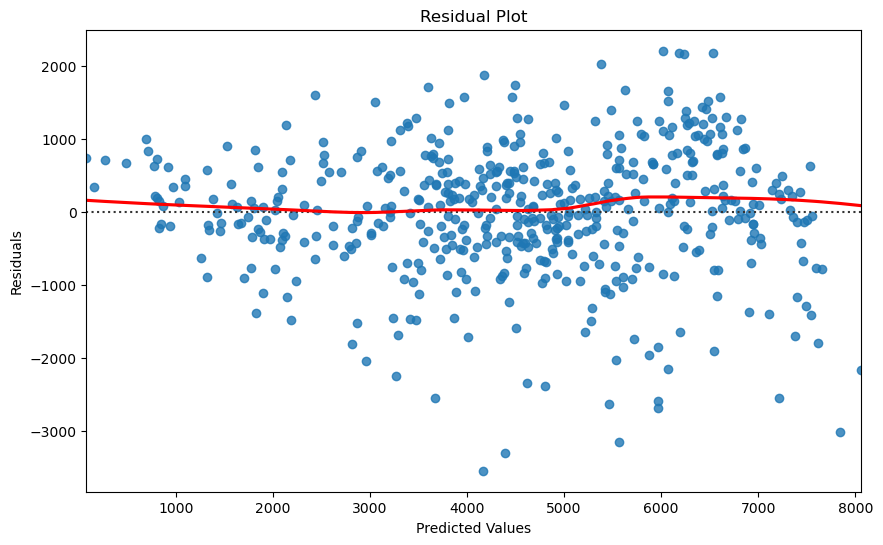

In [56]:
# Evaluate the final model on the training set
# Predicting on the training set
y_train_pred = ols_model7.predict(X_train_sm7)

# Calculating R-squared and Adjusted R-squared
r2_train = ols_model7.rsquared
adj_r2_train = ols_model7.rsquared_adj
print(f"R-squared (Training): {r2_train}")
print(f"Adjusted R-squared (Training): {adj_r2_train}")

# Residual Analysis: Plotting residuals to check for patterns
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

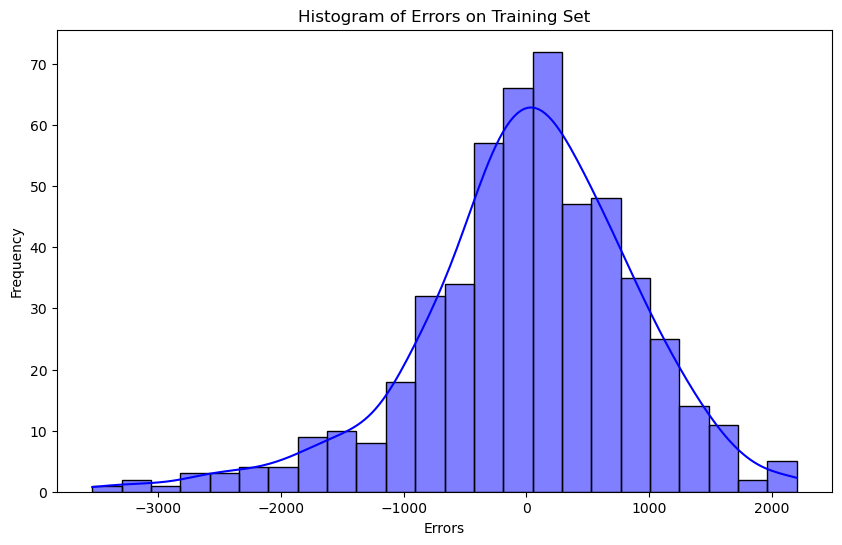

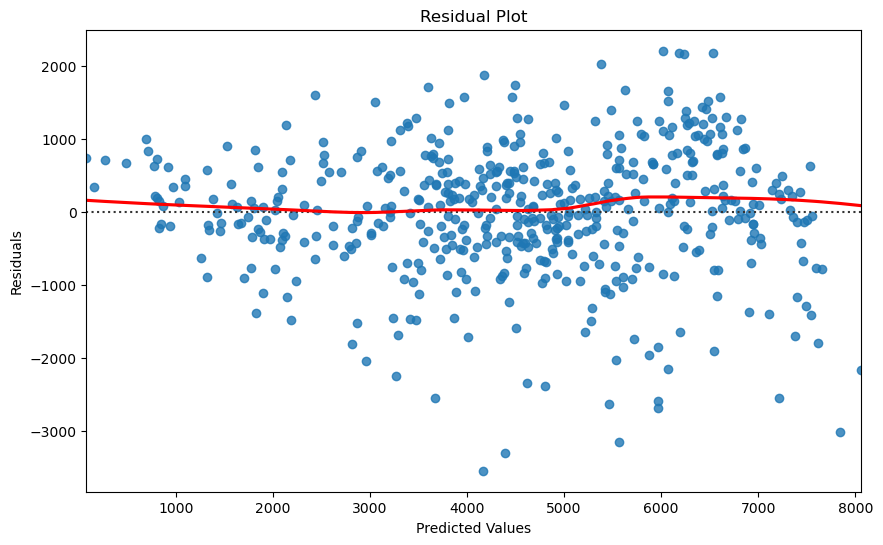

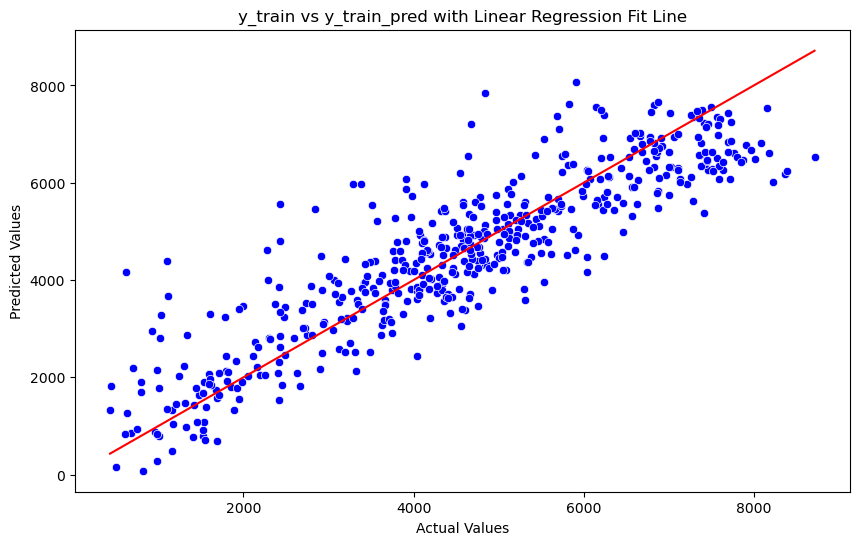

In [64]:
# Plot histogram of errors on training set
plt.figure(figsize=(10, 6))
sns.histplot(y_train - y_train_pred, kde=True, color='blue')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Errors on Training Set')
plt.show()

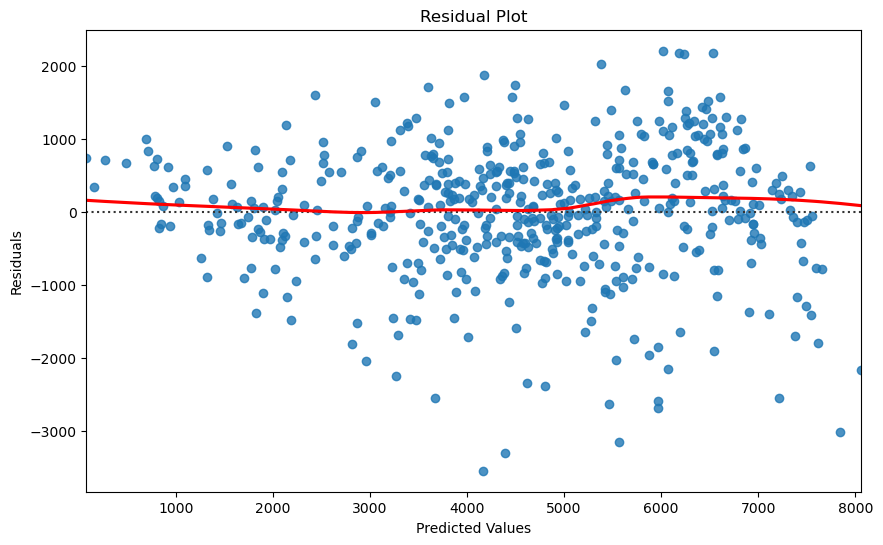

In [65]:
# Check homoscedasticity: Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

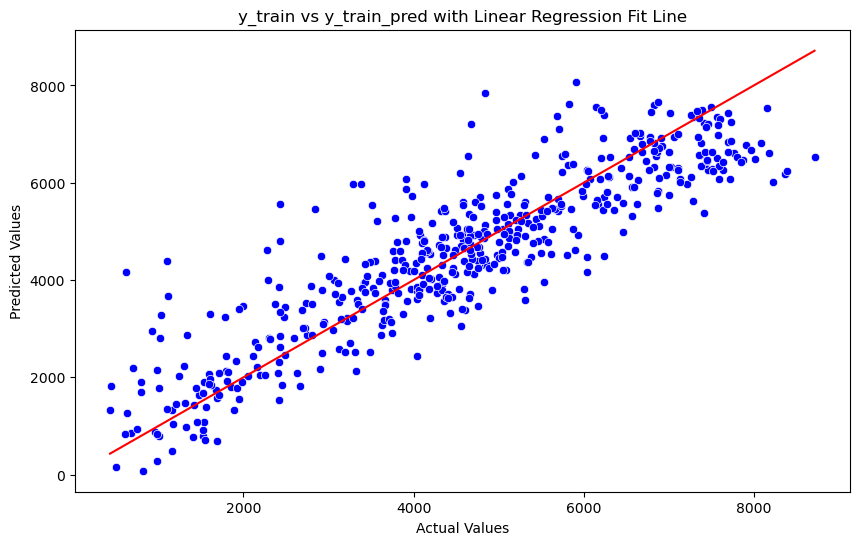

In [66]:
# y_train vs y_train_pred scatter plot with linear regression fit line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred, color='blue')
sns.lineplot(x=y_train, y=y_train, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('y_train vs y_train_pred with Linear Regression Fit Line')
plt.show()

R-squared (Test): 0.7837151043954124
Adjusted R-squared (Test): 0.7813615493105186


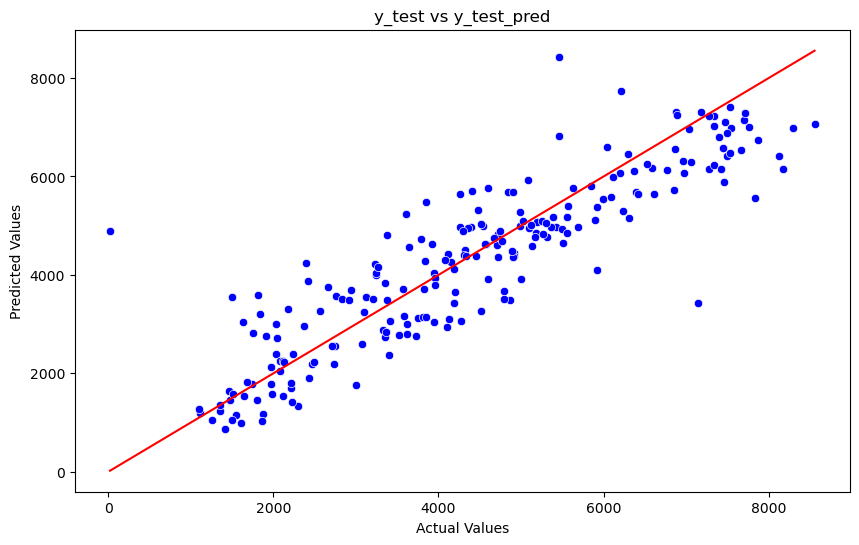

In [63]:
# Predict using the final model on the test set
X_test_sm7 = X_test_sm[X_train_sm7.columns]
y_test_pred = ols_model7.predict(X_test_sm7)

# Calculate R-squared and Adjusted R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(ols_model7, X_test_sm7, y_test)
print(f"R-squared (Test): {r2_test}")
print(f"Adjusted R-squared (Test): {adj_r2_test}")

# Plot y_test vs y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('y_test vs y_test_pred')
plt.show()

In [62]:
# Coefficients of the final model
print("Coefficients of the final model:")
print(ols_model7.params)

# Equation of the best fit line
equation = "cnt = " + " + ".join([f"{coef:.2f}*{name}" for name, coef in ols_model7.params.items()])
print("Equation of the best fit line:")
print(equation)

Coefficients of the final model:
const             4552.951076
yr                 970.768145
workingday         149.422502
atemp             1364.648066
hum               -383.269273
windspeed         -222.951082
season_Winter      452.725663
mnth_December     -120.839183
mnth_July         -235.310279
weekday_Sunday     142.694382
dtype: float64
Equation of the best fit line:
cnt = 4552.95*const + 970.77*yr + 149.42*workingday + 1364.65*atemp + -383.27*hum + -222.95*windspeed + 452.73*season_Winter + -120.84*mnth_December + -235.31*mnth_July + 142.69*weekday_Sunday


In [61]:
# Comparing Adjusted R-squared and R-squared for training and test set
print(f"R-squared (Training): {r2_train}")
print(f"Adjusted R-squared (Training): {adj_r2_train}")
print(f"R-squared (Test): {r2_test}")
print(f"Adjusted R-squared (Test): {adj_r2_test}")

R-squared (Training): 0.7903879073665063
Adjusted R-squared (Training): 0.7866224206724914
R-squared (Test): 0.7837151043954124
Adjusted R-squared (Test): 0.7813615493105186


### Conclusions:

**1. The model shows good performance on both the training and test sets.**

**2. The residual plot indicates homoscedasticity, suggesting that the model's assumptions are met.**

**3. The coefficients and the equation of the best fit line provide insights into the relationship between the features and the target variable.**

**4. The R-squared and Adjusted R-squared values are consistent between the training and test sets, indicating that the model generalizes well to unseen data.**

**Recommendations:**

- Promote bike rentals during warmer months and working days to capitalize on higher demand.

- Plan targeted marketing campaigns for winter and weekends to attract more customers.

- Monitor weather conditions to anticipate demand and adjust bike availability accordingly.

- Offer special discounts during low-demand months like December and July to boost rentals.

- Regularly update the model with new data to maintain accuracy and relevance.